<a href="https://colab.research.google.com/github/hongqin/python-covid19-analysis-sandbox/blob/master/PD_demo_jhu_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Python to analyze the Covid19 data
Hong Qin

Video at https://youtu.be/1JDP4o92tss 

These materials are for education only.


In [17]:
### Import libraries
import pandas as pd # primary data structure library

# Part1. Downloading GitHub Data set 

This data is collected from repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).https://github.com/CSSEGISandData/COVID-19

In [19]:

### Select data path
#fullpath1= '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

fullpath1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

df1 = pd.read_csv(fullpath1, error_bad_lines=False)

#fullpath2 = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
fullpath2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

df2 = pd.read_csv(fullpath2, error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


# Part 2. Explore USA time series by counties

In [20]:
df1.shape

(3342, 876)

In [21]:
df2.shape

(285, 869)

view the dataframe

In [22]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,15930,15939,15939,15939,15939,15963,15969,15978,15978,15978
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,56274,56329,56329,56329,56329,56512,56580,56648,56648,56648
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5694,5695,5695,5695,5695,5707,5710,5714,5714,5714
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6482,6491,6491,6491,6491,6500,6508,6512,6512,6512
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,15055,15061,15061,15061,15061,15073,15077,15084,15084,15084


How to find out the columns?

In [23]:
# dir(df1)

In [24]:
df1.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '5/26/22', '5/27/22', '5/28/22', '5/29/22', '5/30/22', '5/31/22',
       '6/1/22', '6/2/22', '6/3/22', '6/4/22'],
      dtype='object', length=876)

In [25]:
df1.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,10167,10167,10167,10167,10167,10229,10229,10229,10229,10229
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,5658,5658,5658,5658,5658,5681,5681,5681,5681,5681
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,2366,2366,2366,2366,2366,2369,2369,2369,2369,2369
3341,84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,...,1590,1590,1590,1590,1590,1594,1594,1594,1594,1594


In [26]:
df1['Admin2'][3337:3339]

3337    Teton
3338    Uinta
Name: Admin2, dtype: object

In [27]:
df1.iloc[3337:3340, 4:7] #be aware that Python is typically end-exclusive! 

,FIPS,Admin2,Province_State
3337,56039.0,Teton,Wyoming
3338,56041.0,Uinta,Wyoming
3339,90056.0,Unassigned,Wyoming


How to find out dataframe dimensions

In [28]:
print ('dataframe dimensions:', df1.shape)

dataframe dimensions: (3342, 876)


How many "province states" are there in this data set?

In [29]:
df1.Province_State.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [30]:
len(df1.Province_State.unique())

58

### Q, what is the larged case value in this data set? 

In [31]:
df1.iloc[:, 11:].max().max()

2990651

In [32]:
df1.idxmax

<bound method DataFrame.idxmax of            UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0     84001001   US  USA    840   1001.0     Autauga        Alabama   
1     84001003   US  USA    840   1003.0     Baldwin        Alabama   
2     84001005   US  USA    840   1005.0     Barbour        Alabama   
3     84001007   US  USA    840   1007.0        Bibb        Alabama   
4     84001009   US  USA    840   1009.0      Blount        Alabama   
...        ...  ...  ...    ...      ...         ...            ...   
3337  84056039   US  USA    840  56039.0       Teton        Wyoming   
3338  84056041   US  USA    840  56041.0       Uinta        Wyoming   
3339  84090056   US  USA    840  90056.0  Unassigned        Wyoming   
3340  84056043   US  USA    840  56043.0    Washakie        Wyoming   
3341  84056045   US  USA    840  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_  ... 5/26/22  5/27/22  5/28/22  \
0                US  32.539527  -86.

Find out the largest value for column '10/20/21'

In [35]:
df1["5/22/22"].max()

2929950

## Find out which row has the largest value. 

In [ ]:
df1.loc[df1['10/20/21']==1480656]

In [ ]:
LA = df1.iloc[215, 11:]
type(LA)
#print(LA)
LA.plot()

## plot
Because pandas do plot by columns, JHU data set put time series by row. So, we have to transpose the JHU dataframe. 

In [ ]:
UScases = df1.iloc[0:3, 11:].transpose() 
UScases.shape
UScases

In [ ]:
UScases.plot()
UScases.plot(subplots=True)

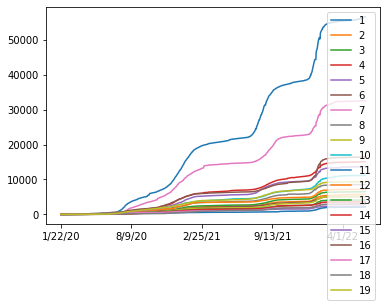

In [36]:
df1.iloc[1:20, 11:].transpose().plot()


## Add meaningful index to the dataframe

In [37]:
# one way is to load csv with index 
df1 = pd.read_csv(fullpath1, error_bad_lines=False, index_col=10) #10th index picks 11th column of "Combined_Key"
df1.reset_index(drop=True)
df1.index

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['Autauga, Alabama, US', 'Baldwin, Alabama, US', 'Barbour, Alabama, US',
       'Bibb, Alabama, US', 'Blount, Alabama, US', 'Bullock, Alabama, US',
       'Butler, Alabama, US', 'Calhoun, Alabama, US', 'Chambers, Alabama, US',
       'Cherokee, Alabama, US',
       ...
       'Park, Wyoming, US', 'Platte, Wyoming, US', 'Sheridan, Wyoming, US',
       'Sublette, Wyoming, US', 'Sweetwater, Wyoming, US',
       'Teton, Wyoming, US', 'Uinta, Wyoming, US', 'Unassigned, Wyoming, US',
       'Washakie, Wyoming, US', 'Weston, Wyoming, US'],
      dtype='object', name='Combined_Key', length=3342)

In [38]:
df1.shape

(3342, 875)

In [39]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22
Combined_Key,,,,,,,,,,,,,,,,,,,,,
"Autauga, Alabama, US",84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,15930,15939,15939,15939,15939,15963,15969,15978,15978,15978
"Baldwin, Alabama, US",84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,56274,56329,56329,56329,56329,56512,56580,56648,56648,56648
"Barbour, Alabama, US",84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5694,5695,5695,5695,5695,5707,5710,5714,5714,5714
"Bibb, Alabama, US",84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6482,6491,6491,6491,6491,6500,6508,6512,6512,6512
"Blount, Alabama, US",84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,15055,15061,15061,15061,15061,15073,15077,15084,15084,15084


In [40]:
# another way is to re-assign index
df1 = pd.read_csv(fullpath1, error_bad_lines=False)
newrows = list( df1['Combined_Key'])
df1.index =  newrows
df1.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


(3342, 876)

In [41]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22
"Autauga, Alabama, US",84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,15930,15939,15939,15939,15939,15963,15969,15978,15978,15978
"Baldwin, Alabama, US",84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,56274,56329,56329,56329,56329,56512,56580,56648,56648,56648
"Barbour, Alabama, US",84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5694,5695,5695,5695,5695,5707,5710,5714,5714,5714
"Bibb, Alabama, US",84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6482,6491,6491,6491,6491,6500,6508,6512,6512,6512
"Blount, Alabama, US",84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,15055,15061,15061,15061,15061,15073,15077,15084,15084,15084


In [42]:
list(df1['Combined_Key'] )[1:10]

['Baldwin, Alabama, US',
 'Barbour, Alabama, US',
 'Bibb, Alabama, US',
 'Blount, Alabama, US',
 'Bullock, Alabama, US',
 'Butler, Alabama, US',
 'Calhoun, Alabama, US',
 'Chambers, Alabama, US',
 'Cherokee, Alabama, US']

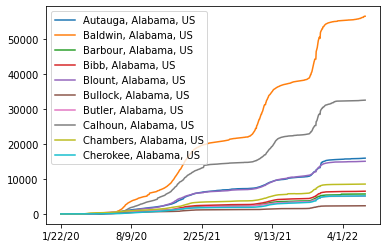

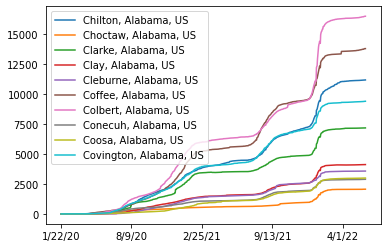

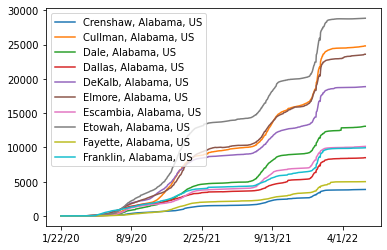

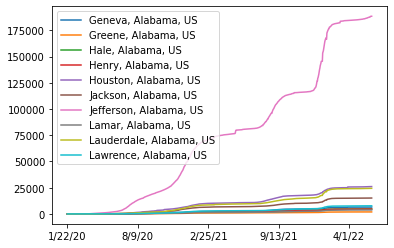

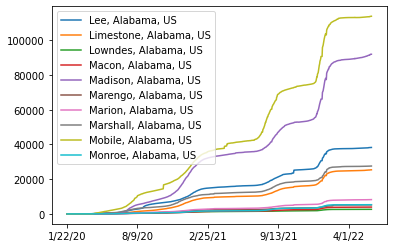

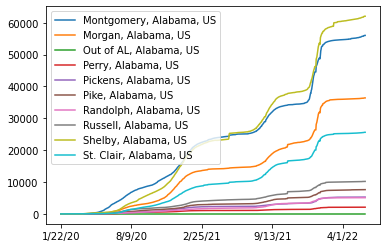

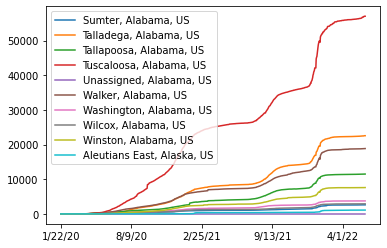

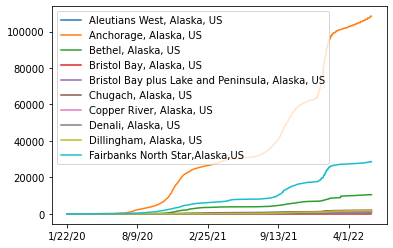

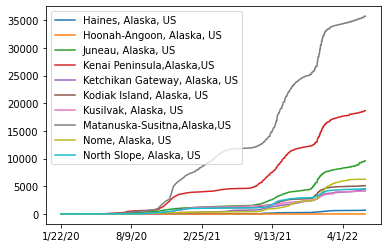

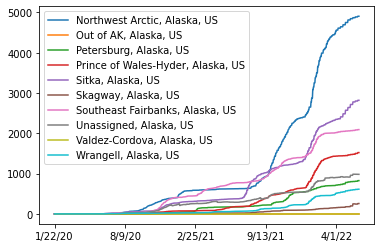

In [43]:
step = 10
for i in range(0, 100, step):
#for i in range(0, 3340, step):
  UScases = df1.iloc[ i : (i+step), 11:].transpose()
  UScases.plot()

In [44]:
df1.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22
"Teton, Wyoming, US",84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,10167,10167,10167,10167,10167,10229,10229,10229,10229,10229
"Uinta, Wyoming, US",84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,5658,5658,5658,5658,5658,5681,5681,5681,5681,5681
"Unassigned, Wyoming, US",84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
"Washakie, Wyoming, US",84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,2366,2366,2366,2366,2366,2369,2369,2369,2369,2369
"Weston, Wyoming, US",84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,...,1590,1590,1590,1590,1590,1594,1594,1594,1594,1594


## Note. It turns out that there are unassigned cases in some states, such as Wyoming. Thse unassigned cases become zero when they are settled. 

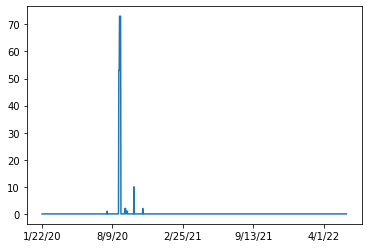

In [45]:
df1.loc['Unassigned, Wyoming, US', ][11:].plot()

In [46]:
df1.loc[ df1.index.str.contains('Unassigned'), ].shape
df1.loc[ df1.index.str.contains('Unassigned'), ].head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22
"Unassigned, Alabama, US",84090001,US,USA,840,90001.0,Unassigned,Alabama,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
"Unassigned, Alaska, US",84090002,US,USA,840,90002.0,Unassigned,Alaska,US,0.0,0.0,...,983,983,983,983,983,983,982,982,982,982
"Unassigned, Arizona, US",84090004,US,USA,840,90004.0,Unassigned,Arizona,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
"Unassigned, Arkansas, US",84090005,US,USA,840,90005.0,Unassigned,Arkansas,US,0.0,0.0,...,27142,27158,27165,27181,27188,27198,27212,27231,27249,27257
"Unassigned, California, US",84090006,US,USA,840,90006.0,Unassigned,California,US,0.0,0.0,...,4293,3769,3769,3769,3769,4010,4010,4010,3619,3619


In [47]:
# df1.loc[df1.index.str.contains('Unassigned'), ].plot() #No, this is not working properly

In [48]:
# df1.loc[df1.index.str.contains("Unsassigned"),11:].plot() #error 

In [49]:
# df1.loc[df1.index.str.contains("Unassigned")][11:].plot() #wrong plot

In [50]:
#df1.loc[df1.index.str.contains('Unassigned'), :][:,11:]

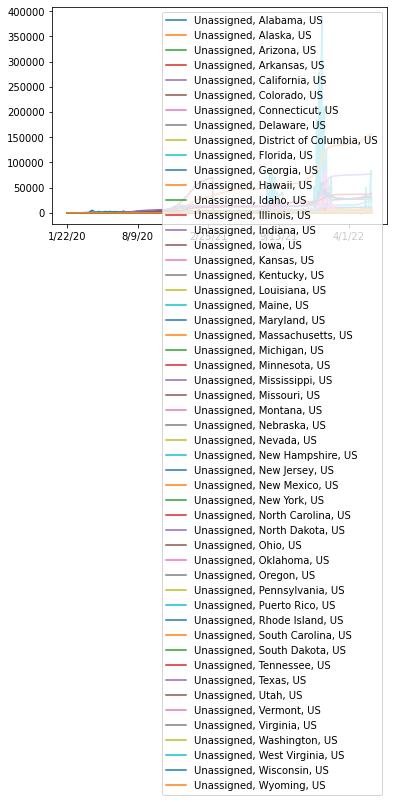

In [51]:
unassigned_df = df1.loc[df1.index.str.contains('Unassigned')]
unassigned_df.iloc[ :, 11:].shape
unassigned_df.iloc[ :, 11:].transpose().plot()

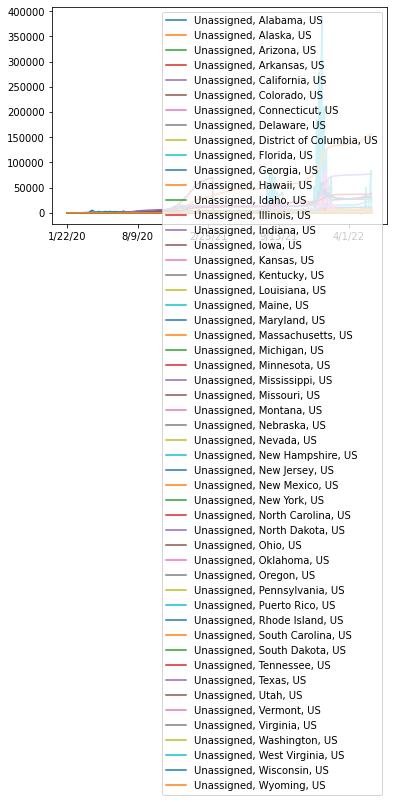

In [52]:
df1.loc[df1.index.str.contains('Unassigned')].iloc[:, 11:].transpose().plot() # Well done, a single line solution! 

## How about the cases at the Hamilton county, TN? 

In [53]:
# Can we examine cumualted cases at the Hamilton County, TN? 


df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22
"Hamilton, Tennessee, US",84047065,US,USA,840,47065.0,Hamilton,Tennessee,US,35.176702,-85.166522,...,101471,101542,101614,101126,101126,101126,101614,101614,101614,101614


In [54]:
dfHamilton = df1[df1.Combined_Key == "Hamilton, Tennessee, US"]
dfHamilton

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22
"Hamilton, Tennessee, US",84047065,US,USA,840,47065.0,Hamilton,Tennessee,US,35.176702,-85.166522,...,101471,101542,101614,101126,101126,101126,101614,101614,101614,101614


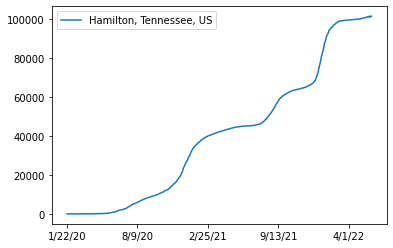

In [55]:
df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().plot()

# Part 3. Examine the cases in each state.

In [60]:

df1.loc[ :, 'Province_State']

Autauga, Alabama, US       Alabama
Baldwin, Alabama, US       Alabama
Barbour, Alabama, US       Alabama
Bibb, Alabama, US          Alabama
Blount, Alabama, US        Alabama
                            ...   
Teton, Wyoming, US         Wyoming
Uinta, Wyoming, US         Wyoming
Unassigned, Wyoming, US    Wyoming
Washakie, Wyoming, US      Wyoming
Weston, Wyoming, US        Wyoming
Name: Province_State, Length: 3342, dtype: object

In [61]:
groupby_state = df1.iloc[:,11:].groupby(df1['Province_State'])
type( groupby_state )

pandas.core.groupby.generic.DataFrameGroupBy

In [62]:
df_by_state = groupby_state.sum()
type( df_by_state )

pandas.core.frame.DataFrame

In [63]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,1311381,1312437,1312437,1312437,1312437,1314963,1315934,1317029,1317029,1317029
Alaska,0,0,0,0,0,0,0,0,0,0,...,260059,260059,260059,260059,260059,260059,262071,262071,262071,262071
American Samoa,0,0,0,0,0,0,0,0,0,0,...,6110,6130,6130,6130,6145,6145,6145,6192,6192,6192
Arizona,0,0,0,0,1,1,1,1,1,1,...,2049627,2049627,2049627,2049627,2049627,2049627,2062669,2062669,2062669,2062669
Arkansas,0,0,0,0,0,0,0,0,0,0,...,842048,842439,842815,843065,843153,843362,843828,844463,845175,845647


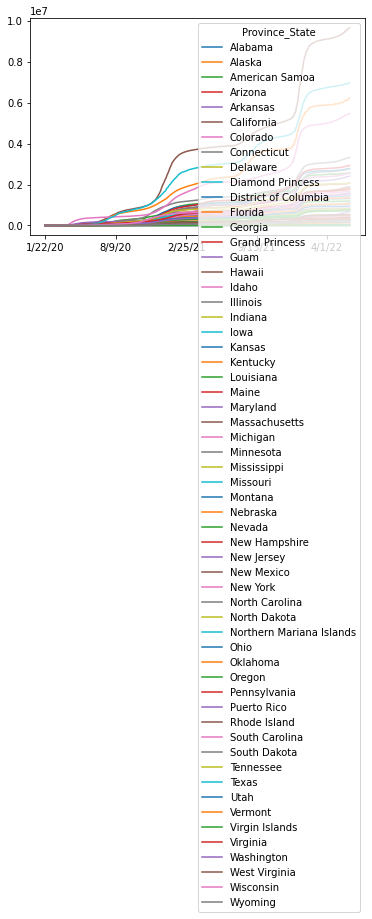

In [64]:
df_by_state.transpose().plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f525e86ca10>,
      dtype=object)

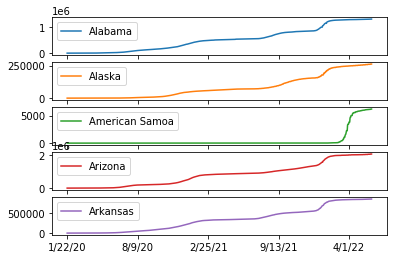

In [65]:
df_by_state.transpose().iloc[:,0:5].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f525e8774d0>],
      dtype=object)

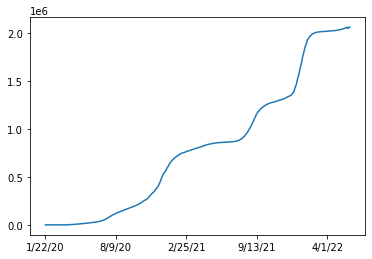

In [66]:
df_by_state.transpose().loc[:,"Tennessee"].plot(subplots=True)

In [67]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,1311381,1312437,1312437,1312437,1312437,1314963,1315934,1317029,1317029,1317029
Alaska,0,0,0,0,0,0,0,0,0,0,...,260059,260059,260059,260059,260059,260059,262071,262071,262071,262071
American Samoa,0,0,0,0,0,0,0,0,0,0,...,6110,6130,6130,6130,6145,6145,6145,6192,6192,6192
Arizona,0,0,0,0,1,1,1,1,1,1,...,2049627,2049627,2049627,2049627,2049627,2049627,2062669,2062669,2062669,2062669
Arkansas,0,0,0,0,0,0,0,0,0,0,...,842048,842439,842815,843065,843153,843362,843828,844463,845175,845647


In [68]:
# df_by_state.loc['Tennessee'][11:].transpose().plot() #This is bit problematic on the columns

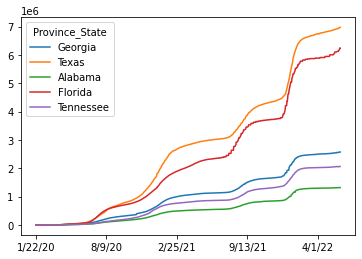

In [69]:
df_by_state.loc[['Georgia', 'Texas', 'Alabama', 'Florida', 'Tennessee']].transpose().plot() #Here, Texas and Tennessee are row-index

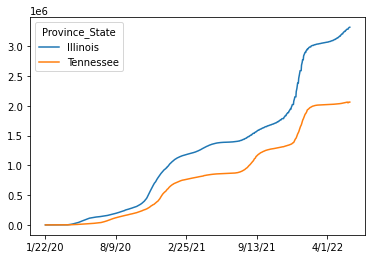

In [98]:
df_by_state.transpose()[['Illinois', 'Tennessee']].plot() #Here, Texas ans Tennessee are columns

## How to examine the new cases daily? 

### diff() on a test dataframe

In [71]:
dataset = [(2, 4, 6, 8),
           (10, 12, 14, 18),
           (20, 22, 24, 26),
           (28, 30, 32, 34)];

df_test = pd.DataFrame(dataset, columns = ("A", "B", "C", "D" ));


In [72]:
df_test.diff(axis=0) #by row

,A,B,C,D
0,NaN,NaN,NaN,NaN
1,8.0,8.0,8.0,10.0
2,10.0,10.0,10.0,8.0
3,8.0,8.0,8.0,8.0


In [73]:
df_test.diff(axis=1) #by column

,A,B,C,D
0,NaN,2,2,2
1,NaN,2,2,4
2,NaN,2,2,2
3,NaN,2,2,2


### diff() on US covid19 data set
 JHU cases are by row, and we need to calculate difference between columns

In [74]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,1311381,1312437,1312437,1312437,1312437,1314963,1315934,1317029,1317029,1317029
Alaska,0,0,0,0,0,0,0,0,0,0,...,260059,260059,260059,260059,260059,260059,262071,262071,262071,262071
American Samoa,0,0,0,0,0,0,0,0,0,0,...,6110,6130,6130,6130,6145,6145,6145,6192,6192,6192
Arizona,0,0,0,0,1,1,1,1,1,1,...,2049627,2049627,2049627,2049627,2049627,2049627,2062669,2062669,2062669,2062669
Arkansas,0,0,0,0,0,0,0,0,0,0,...,842048,842439,842815,843065,843153,843362,843828,844463,845175,845647


In [75]:
df_dailycases_by_state =  df_by_state.diff(axis=1) #1 by columns
df_dailycases_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,NaN,0,0,0,0,0,0,0,0,0,...,868,1056,0,0,0,2526,971,1095,0,0
Alaska,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2012,0,0,0
American Samoa,NaN,0,0,0,0,0,0,0,0,0,...,0,20,0,0,15,0,0,47,0,0
Arizona,NaN,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,13042,0,0,0
Arkansas,NaN,0,0,0,0,0,0,0,0,0,...,373,391,376,250,88,209,466,635,712,472


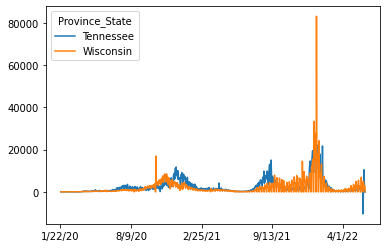

In [76]:
df_dailycases_by_state.transpose()[['Tennessee', 'Wisconsin']].plot()

In [77]:
df_dailycases_by_state.loc[['Tennessee', 'Texas']].iloc[:, 2:].rolling(window=3).mean()

#.rolling(window=3).mean()

,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,...,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Tennessee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].rolling(window=3, center=False).mean()

Province_State,Tennessee,Alaska
1/22/20,NaN,NaN
1/23/20,NaN,NaN
1/24/20,NaN,NaN
1/25/20,0.000000,0.000000
1/26/20,0.000000,0.000000
...,...,...
5/31/22,-3486.666667,0.000000
6/1/22,3486.666667,670.666667
6/2/22,3486.666667,670.666667
6/3/22,3486.666667,670.666667


In [79]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].head()

Province_State,Tennessee,Alaska
1/22/20,NaN,NaN
1/23/20,0.0,0.0
1/24/20,0.0,0.0
1/25/20,0.0,0.0
1/26/20,0.0,0.0


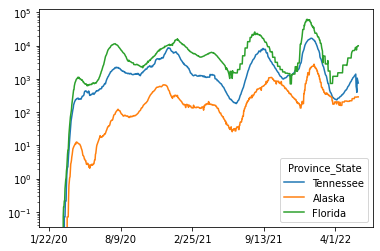

In [99]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska', 'Florida']].rolling(window=14).mean().plot(logy=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f525eabfb50>,
      dtype=object)

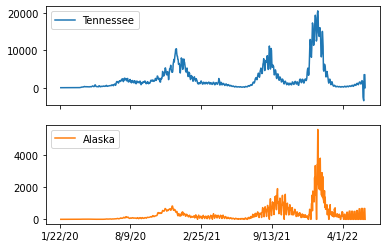

In [81]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].rolling(window=3).mean().plot(subplots=True)

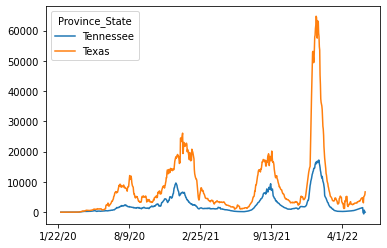

In [82]:
df_dailycases_by_state.transpose()[['Tennessee', 'Texas']].rolling(window=7).mean().plot()

In [83]:
df_dailycases_by_state.transpose()[['Tennessee', 'Texas']].head()

Province_State,Tennessee,Texas
1/22/20,NaN,NaN
1/23/20,0.0,0.0
1/24/20,0.0,0.0
1/25/20,0.0,0.0
1/26/20,0.0,0.0


## Examine the daily confirmed cases in Hamilton County, TN

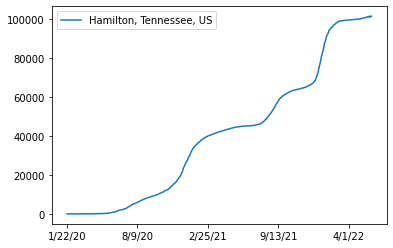

In [84]:
df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().plot()

In [85]:
df_Hamilton = df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:]

type(df_Hamilton)
df_Hamilton.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22
"Hamilton, Tennessee, US",0,0,0,0,0,0,0,0,0,0,...,101471,101542,101614,101126,101126,101126,101614,101614,101614,101614


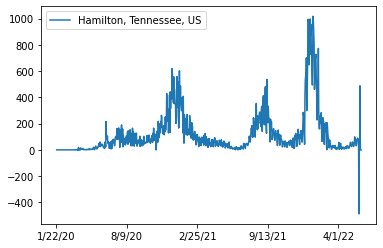

In [86]:
df_Hamilton.transpose().diff(axis=0).plot()

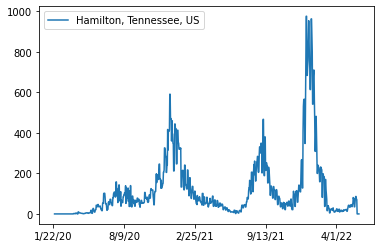

In [87]:
df_Hamilton.transpose().diff(axis=0).rolling(window=3).median().plot()

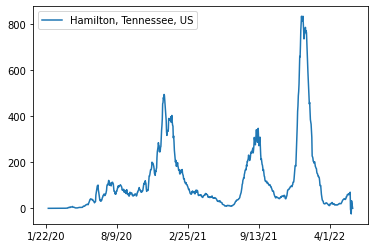

In [88]:
df_Hamilton.transpose().diff(axis=0).rolling(window=7).mean().plot()

## Pick a time window using datetime

In [89]:
#from datetime import datetime 

df_dailycases_by_state2 = df_dailycases_by_state.transpose()

df_dailycases_by_state2.head()

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### convert row index to datetime

In [90]:
df_dailycases_by_state2.index = pd.to_datetime(df_dailycases_by_state2.index)
df_dailycases_by_state2.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2022-05-26', '2022-05-27', '2022-05-28', '2022-05-29',
               '2022-05-30', '2022-05-31', '2022-06-01', '2022-06-02',
               '2022-06-03', '2022-06-04'],
              dtype='datetime64[ns]', length=865, freq=None)

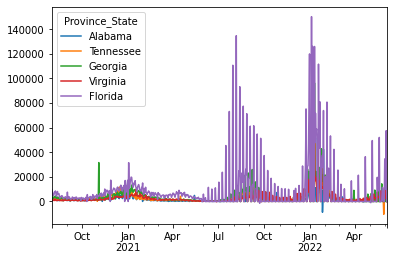

In [91]:
df_dailycases_by_state2.loc['2020-08-01':, ['Alabama', 'Tennessee', 'Georgia', 'Virginia', 'Florida']].plot()


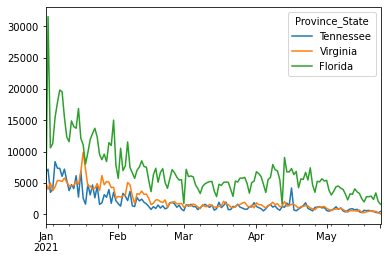

In [92]:

df_dailycases_by_state2.loc['2021-01-01':'2021-05-24', ['Tennessee',  'Virginia', 'Florida']].plot()

## Examine the row with the largest value on 9/8/2020

In [93]:
subset = df1.loc[df1['9/8/20']==249241]

In [94]:
subset = subset.transpose()
subset = subset.iloc[:][11:]
type(subset)

pandas.core.frame.DataFrame

In [95]:
type(subset)

pandas.core.frame.DataFrame

In [96]:
from datetime import datetime

#datetime.strptime( '9/8/20', '%m/%d/%y') 

dates = [datetime.strptime( x, '%m/%d/%y') for x in subset.columns[11:]]
print(dates)

[]


In [97]:
df1.iloc[5:10, -20:-1 ]

,5/16/22,5/17/22,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22,5/24/22,5/25/22,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22
"Bullock, Alabama, US",2319,2320,2327,2327,2328,2328,2328,2328,2329,2333,2333,2334,2334,2334,2334,2336,2337,2337,2337
"Butler, Alabama, US",5070,5070,5070,5071,5073,5073,5073,5075,5075,5082,5083,5083,5083,5083,5083,5089,5091,5094,5094
"Calhoun, Alabama, US",32468,32486,32498,32509,32512,32512,32512,32528,32540,32546,32552,32558,32558,32558,32558,32581,32596,32604,32604
"Chambers, Alabama, US",8511,8512,8516,8517,8518,8518,8518,8523,8524,8526,8530,8535,8535,8535,8535,8543,8551,8553,8553
"Cherokee, Alabama, US",5131,5134,5135,5135,5137,5137,5137,5139,5143,5147,5149,5149,5149,5149,5149,5152,5157,5161,5161


#Part 4 Explore Global Data set

In [ ]:

df2 = pd.read_csv(fullpath2, error_bad_lines=False)
df2.columns

In [ ]:
df2['Country/Region']
list(df2['Country/Region'].unique())

In [ ]:
# Countries affected
countries = df2['Country/Region'].unique().tolist()
print("\nTotal countries affected by virus: ",len(countries))
print(countries)

In [ ]:
df2by_country = df2.iloc[:, 5:].groupby(df2['Country/Region']).sum().transpose()

In [ ]:
df2by_country.head()

In [ ]:
df2by_country.index = pd.to_datetime(df2by_country.index)

In [ ]:
### Check if the dataframe contains NaN values
df2by_country.head()

In [ ]:
  df2by_country.columns[ df2by_country.columns.str.contains('US') ]

In [ ]:
  df2by_country[['US', 'France', 'India', 'Sweden']].plot(logy=True)


In [ ]:
  df2by_country[['US', 'France', 'India', 'Sweden']]['2020-05-01':].plot(logy=False)

# Alternative approach to load data from GitHub

Go to GitHub, select the csv file,  select "view as raw",  and copy the URL. 

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"

df = pd.read_csv(url)

In [ ]:
df.head

In [ ]:
? pd.read_csv()

In [ ]:
df2 = pd.read_csv(url, skiprows=5)
df2.head

#Part 5. In progress Load Google Mobility data set

## Use magjic commands to download data

In [ ]:
! wget https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip 

In [ ]:
! unzip /content/Region_Mobility_Report_CSVs.zip

In [ ]:
! ls *US*csv

## Read csv into pandas dataframe, and merge them

In [ ]:
df_US20 = pd.read_csv( "2020_US_Region_Mobility_Report.csv")
df_US21 = pd.read_csv( "2021_US_Region_Mobility_Report.csv")
df_US22 = pd.read_csv( "2021_US_Region_Mobility_Report.csv")

In [ ]:
df_US = pd.concat( [df_US20, df_US21, df_US22] )
df_US.head()

In [ ]:
df_US.tail()

## convert date into objects

In [ ]:
df_US.index = pd.to_datetime(df_US.date)
df_US.index

## Pick Hamilton County, Tennessee

### Hamilton TN moblility

In [ ]:
#df_US.loc[ df_US.sub_region_1=='Tennessee'  ]

df_Hamilton_GM = df_US.loc[ ( df_US.sub_region_1=='Tennessee' ) & (df_US.sub_region_2=='Hamilton County') ]
df_Hamilton_GM.tail()

## Hamilton, TN COVID

In [ ]:
df_Hamilton_COVID = df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().diff(axis=0).rolling(window=7).mean()

type(df_Hamilton_COVID)
df_Hamilton_COVID.tail()

In [ ]:
df_Hamilton_COVID.index = pd.to_datetime(df_Hamilton_COVID.index)
df_Hamilton_COVID.rename(columns={"Hamilton, Tennessee, US":"daily_cases"}, inplace=True)
df_Hamilton_COVID.tail()

### Merge mobiligy with COVID data for Hamilton, TN

In [ ]:
df_Hamilton = pd.merge(df_Hamilton_COVID, df_Hamilton_GM, left_index=True, right_index=True)
df_Hamilton.tail()

## Plot

In [ ]:
df_Hamilton[['daily_cases', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']].plot()

In [ ]:
df_Hamilton[['daily_cases', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']].plot(subplots=True)

### Plot with normalized data and moving windows

In [ ]:
df_Hamilton2 = df_Hamilton[['daily_cases', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']]

df_Hamilton2 = ( df_Hamilton2 - df_Hamilton2.mean() ) / df_Hamilton2.std() 

df_Hamilton2.loc['2020-02-01':'2021-04-01', ].plot()

 Try to remove the weekly fluctuation by 15-day moving window

In [ ]:
df_Hamilton2.loc['2020-02-01':'2021-04-01', ].rolling(window=15).median().plot()